In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\hanie\anaconda3\lib\site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn import tree
import joblib

# Read the CSV and Perform Basic Data Cleaning

In [36]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [37]:
df["koi_disposition"].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [39]:
#Use `koi_disposition` for the y values
X=df.drop("koi_disposition", axis=1)
feature_names = X.columns
y=df["koi_disposition"]

def functionrand(x):
    if x == 'CONFIRMED':
        return 1
    else:
        return 0
y = y.apply(functionrand)
y[:5]


0    1
1    0
2    0
3    1
4    1
Name: koi_disposition, dtype: int64

In [40]:
# Split data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.898741418764302

In [48]:
#get the importance of features to use it in other models 
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.06600772838048866, 'koi_steff_err1'),
 (0.06153865435894462, 'koi_model_snr'),
 (0.05577112037999691, 'koi_steff_err2'),
 (0.05481768983263144, 'koi_duration_err1'),
 (0.05451482376913933, 'koi_duration_err2'),
 (0.0477813180105035, 'koi_fpflag_co'),
 (0.0470034966121054, 'koi_prad'),
 (0.03877073724308245, 'koi_prad_err2'),
 (0.03740159048935668, 'koi_prad_err1'),
 (0.0336555626236143, 'koi_time0bk_err1'),
 (0.0299247668213067, 'koi_fpflag_ss'),
 (0.029718951570023387, 'koi_time0bk_err2'),
 (0.02810626968618475, 'koi_duration'),
 (0.02608701816430399, 'koi_impact'),
 (0.025722609242033095, 'koi_period'),
 (0.023622639402860624, 'koi_srad_err1'),
 (0.021603712216984986, 'koi_depth'),
 (0.01923538734269238, 'koi_teq'),
 (0.018857226207319115, 'koi_slogg_err2'),
 (0.017878998123069253, 'koi_depth_err2'),
 (0.016726732076664384, 'koi_depth_err1'),
 (0.01644723369507654, 'koi_insol_err1'),
 (0.016167884957917197, 'ra'),
 (0.016161691031491326, 'koi_period_err1'),
 (0.016061705103042636

In [49]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.898741418764302


In [50]:
from sklearn.tree import export_graphviz

In [51]:
from matplotlib import pyplot as plt

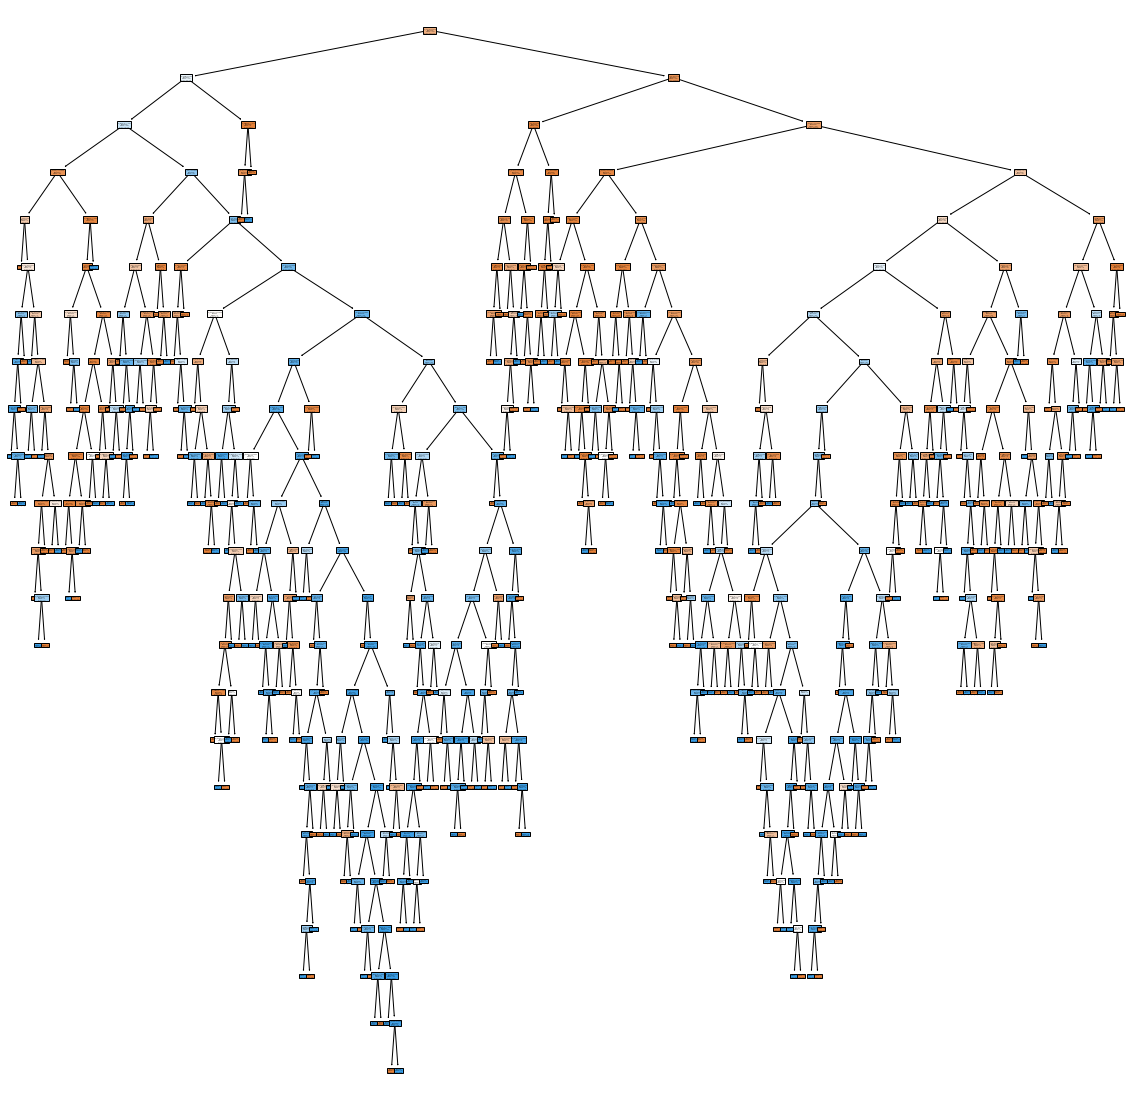

In [52]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [57]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [3, 5],
              'n_estimators': [100, 200],
             'max_depth':[6, 8, 10]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [58]:
# Train the model with GridSearch
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=6, min_samples_split=3, n_estimators=100 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_split=3, n_estimators=100, score=0.900, total=   0.9s
[CV] max_depth=6, min_samples_split=3, n_estimators=100 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=6, min_samples_split=3, n_estimators=100, score=0.896, total=   0.8s
[CV] max_depth=6, min_samples_split=3, n_estimators=100 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=6, min_samples_split=3, n_estimators=100, score=0.894, total=   0.7s
[CV] max_depth=6, min_samples_split=3, n_estimators=100 ..............
[CV]  max_depth=6, min_samples_split=3, n_estimators=100, score=0.883, total=   0.7s
[CV] max_depth=6, min_samples_split=3, n_estimators=100 ..............
[CV]  max_depth=6, min_samples_split=3, n_estimators=100, score=0.879, total=   0.7s
[CV] max_depth=6, min_samples_split=3, n_estimators=200 ..............
[CV]  max_depth=6, min_samples_split=3, n_estimators=200, score=0.899, total=   1.6s
[CV] max_depth=6, min_samples_split=3, n_estimators=200 ..............
[CV]  max_depth=6, min_samples_split=3, n_estimators=200, score=0.895, total=   1.6s
[CV] max_depth=6, min_samples_split=3, n_estimators=200 ..............
[CV]  max_depth=6, min_samples_split=3, n_estimators=200, score=0.897, total=   1.5s
[CV] max_depth=6, min_samples_split=3, n_estimators=200 ..............
[CV]  max_depth=6, min_samples_split=3, n_estimators=200, score=

[CV]  max_depth=10, min_samples_split=5, n_estimators=200, score=0.905, total=   1.8s
[CV] max_depth=10, min_samples_split=5, n_estimators=200 .............
[CV]  max_depth=10, min_samples_split=5, n_estimators=200, score=0.911, total=   1.8s
[CV] max_depth=10, min_samples_split=5, n_estimators=200 .............
[CV]  max_depth=10, min_samples_split=5, n_estimators=200, score=0.902, total=   1.8s
[CV] max_depth=10, min_samples_split=5, n_estimators=200 .............
[CV]  max_depth=10, min_samples_split=5, n_estimators=200, score=0.898, total=   1.8s
[CV] max_depth=10, min_samples_split=5, n_estimators=200 .............
[CV]  max_depth=10, min_samples_split=5, n_estimators=200, score=0.883, total=   1.8s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.3min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [6, 8, 10], 'min_samples_split': [3, 5],
                         'n_estimators': [100, 200]},
             verbose=3)

In [59]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 200}
0.8998630102096508


In [60]:
rf_final= RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=5)
rf_final.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=6, min_samples_split=5)

In [61]:
rf_final.score(X_test_scaled, y_test)

0.8913043478260869

# Save the Model

In [64]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'randomforest.sav'
joblib.dump(rf_final, filename)

['randomforest.sav']